In [1]:

# Импортируем необходимые библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import VotingRegressor
from sklearn.model_selection import RandomizedSearchCV


# 1. Загрузка и первичный анализ данных
df = pd.read_csv('https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.csv')

# Просмотр первых строк дата-сета
df.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [2]:
# Основная информация о данных
df.info()

# Статистическое описание данных
df.describe()

# Проверка пропущенных значений
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [3]:
# 2. Предобработка данных
# Заполнение пропущенных значений медианой для числовых данных
df_numeric = df.select_dtypes(include=[np.number])
df_numeric = df_numeric.fillna(df_numeric.median())

# Заполнение пропущенных значений наиболее частым значением для категориальных данных
df_categorical = df.select_dtypes(exclude=[np.number])
df_categorical = df_categorical.apply(lambda x: x.fillna(x.mode()[0]))

# Объединение обработанных данных
df = pd.concat([df_numeric, df_categorical], axis=1)

# Преобразование категориальных признаков в числовые
df = pd.get_dummies(df)

# Разделение данных на обучающую и тестовую выборки
X = df.drop('median_house_value', axis=1)
y = df['median_house_value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Масштабирование данных
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



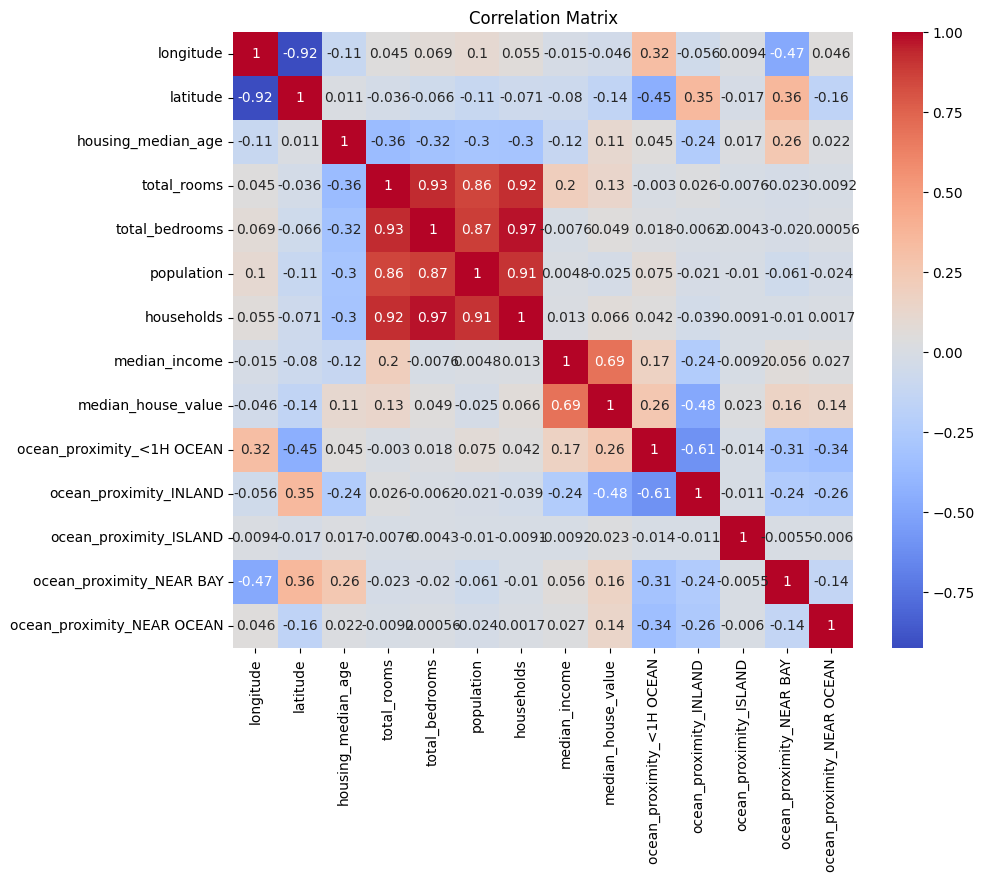

In [4]:
# 3. Разведывательный анализ данных (EDA)
# Корреляционный анализ
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [5]:
# 5. Построение моделей машинного обучения
# Линейная регрессия
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Случайный лес
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Градиентный бустинг
gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(X_train, y_train)
y_pred_gbr = gbr.predict(X_test)

# ridge
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)


In [6]:
# 6. Оценка моделей
def evaluate_model(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mse, mae, r2

metrics_lr = evaluate_model(y_test, y_pred_lr)
metrics_rf = evaluate_model(y_test, y_pred_rf)
metrics_gbr = evaluate_model(y_test, y_pred_gbr)


metrics_ridge = evaluate_model(y_test, y_pred_ridge)
print(f"Ridge Regression - MSE: {metrics_ridge[0]}, MAE: {metrics_ridge[1]}, R2: {metrics_ridge[2]}")
print(f"Linear Regression - MSE: {metrics_lr[0]}, MAE: {metrics_lr[1]}, R2: {metrics_lr[2]}")
print(f"Random Forest - MSE: {metrics_rf[0]}, MAE: {metrics_rf[1]}, R2: {metrics_rf[2]}")
print(f"Gradient Boosting - MSE: {metrics_gbr[0]}, MAE: {metrics_gbr[1]}, R2: {metrics_gbr[2]}")


Ridge Regression - MSE: 4908043808.254885, MAE: 50668.1315638925, R2: 0.6254570985278605
Linear Regression - MSE: 4908476721.156615, MAE: 50670.73824097191, R2: 0.6254240620553606
Random Forest - MSE: 2395314930.144464, MAE: 31628.59239098837, R2: 0.8172085990009053
Gradient Boosting - MSE: 3122772897.18791, MAE: 38250.01529954115, R2: 0.761694787731084


In [7]:
# 7. Подбор гиперпараметров для лучшей модели
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

random_search = RandomizedSearchCV(rf, param_distributions=param_grid, n_iter=15, cv=3, scoring='neg_mean_squared_error', n_jobs=-1, random_state=42)
random_search.fit(X_train, y_train)

best_rf = random_search.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)
metrics_best_rf = evaluate_model(y_test, y_pred_best_rf)

print(f"Best Random Forest - MSE: {metrics_best_rf[0]}, MAE: {metrics_best_rf[1]}, R2: {metrics_best_rf[2]}")



/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 12 is smaller than n_iter=15. Running 12 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best Random Forest - MSE: 2379640474.728315, MAE: 31464.93347383721, R2: 0.818404748880555


In [8]:
# 8. Построение ансамблевой модели
voting_reg = VotingRegressor([('lr', lr), ('rf', best_rf), ('gbr', gbr), ('ridge', ridge)])
voting_reg.fit(X_train, y_train)
y_pred_voting = voting_reg.predict(X_test)
metrics_voting = evaluate_model(y_test, y_pred_voting)

print(f"Voting Regressor - MSE: {metrics_voting[0]}, MAE: {metrics_voting[1]}, R2: {metrics_voting[2]}")

Voting Regressor - MSE: 3312399748.167572, MAE: 39994.94359559462, R2: 0.7472239733419596
